Importing the Dependencies

In [208]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

Data Collection & Processing

In [186]:
data_frame = pd.read_csv('/content/dataset.csv')

In [176]:
# for col in data_frame.columns:
#     print(col)

In [187]:
data_frame.head()
data_frame = data_frame.drop(['Unnamed: 32'], axis=1)

In [188]:
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [189]:
M = data_frame[data_frame.diagnosis == "M"]
B = data_frame[data_frame.diagnosis == "B"]

data_frame['label'] = data_frame['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
data_frame['diagnosis'] = data_frame['diagnosis'].apply(lambda x: '1' if x == 'M' else '0')
# data_frame['label'] = data_frame['label'].astype("float64")

In [190]:
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


1 --> Benign

0 --> Malignant

In [191]:
data_frame.groupby('label').mean()

<ipython-input-191-05bd2fb6f748>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_frame.groupby('label').mean()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
label,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Separating the features and target

In [192]:
X = data_frame.drop(columns = ['label'], axis=1)
Y = data_frame['label']

Data Visualization

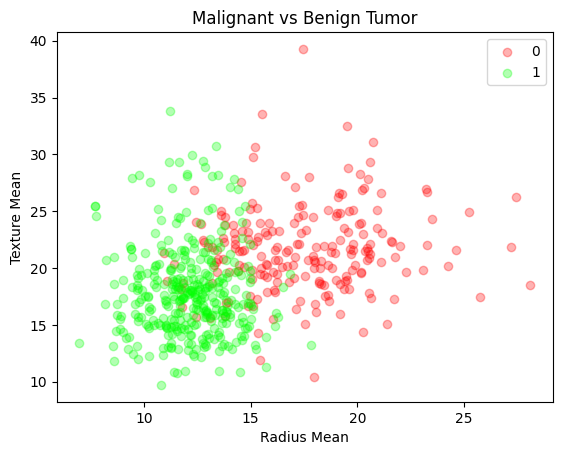

In [193]:
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = 0, alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = 1, alpha = 0.3)
plt.legend()
plt.show()

In [194]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: label, Length: 569, dtype: object


Splitting the data into training data & Testing data

In [195]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [196]:
print(X.shape, X_train.shape, X_test.shape)

(569, 32) (455, 32) (114, 32)


In [197]:
print(Y_train)

560    0
428    0
198    1
203    1
41     1
      ..
299    0
534    0
493    0
527    0
168    1
Name: label, Length: 455, dtype: object


Model Training

Logistic Regression

In [198]:
logisticRegressionModel = LogisticRegression()
randomForestModel = RandomForestClassifier()

In [199]:
logisticRegressionModel.fit(X_train, Y_train)
randomForestModel.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

Logistic Regression Accuracy Score

In [200]:
X_train_prediction = logisticRegressionModel.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

Random Forest Accuracy Score

In [201]:
X_train_prediction_random_forest = randomForestModel.predict(X_train)
training_data_accuracy_random_forest = accuracy_score(Y_train, X_train_prediction_random_forest)

In [202]:
print('Accuracy on training data using Logistic Regression = ', training_data_accuracy)
print('Accuracy on training data using Random Forest = ', training_data_accuracy_random_forest)

Accuracy on training data using Logistic Regression =  0.6329670329670329
Accuracy on training data using Random Forest =  1.0


Prediction using Logistic Regression

In [203]:
# accuracy on test data
X_test_prediction = logisticRegressionModel.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on test data using Logistic Rgression = ', test_data_accuracy)

Accuracy on test data using Logistic Rgression =  0.6052631578947368


Prediction using Random Forest

In [210]:
# accuracy on test data
X_test_prediction_random_forest = randomForestModel.predict(X_test)
test_data_accuracy_random_forest = accuracy_score(Y_test, X_test_prediction_random_forest)
print('Accuracy on test data using Random Forest Classifier= ', test_data_accuracy_random_forest)


acc_rmf_model=roc_auc_score(Y_test, X_test_prediction_random_forest)*100
print('ROC Score on test data using Random Forest Classifier= ', acc_rmf_model)

Accuracy on test data using Random Forest Classifier=  0.9824561403508771
ROC Score on test data using Random Forest Classifier=  98.55072463768116


Creating pickle file

In [211]:
import pickle
pickle.dump(randomForestModel, open('breast_cancer.pkl','wb'))

Building a Predictive System

In [213]:
input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259, 0, 0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logisticRegressionModel.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == '0'):
  print('The Breast cancer is Malignant')
else:
  print('The Breast Cancer is Benign')



['0']
The Breast cancer is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
